In [1]:
import yfinance as yf
import numpy as np

import pystocksim
import returns as ret

# Get Stock Historical Data

In [2]:
stock = yf.Ticker("TSLA")

In [3]:
historicals = stock.history(period="1mo", interval="1d")

In [4]:
opens = historicals.iloc[:,0]
closes = historicals.iloc[:,3]

# Run Monte-Carlo Simulations.

In [5]:
propogateFor = 14
numTrials = 50000

allFutureAbs, allFutureRel, allFutureROI, logDeltas, mu, sigma = pystocksim.evaluate(opens, closes, propogateFor, numTrials)

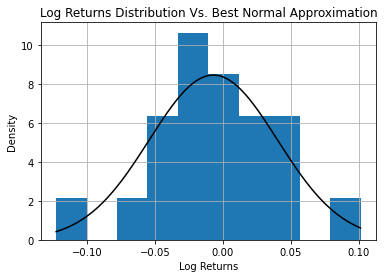

In [6]:
ret.plotDeltas(logDeltas, mu, sigma)

# Gain Insights Fast.

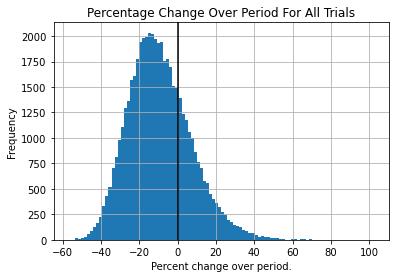


Looking at the 50000 trials conducted, here are the insights:

   -> Profitable Trials (ROI>0): 13083 (26.17%).
   -> Unprofitable Trials (ROI<0): 36917 (73.83%).

   -> Mean End Price: 733.9427 $.
   -> Mean Change: -75.9111 $ (-9.3732%).


In [7]:
pystocksim.insigits(allFutureAbs, allFutureRel, allFutureROI, numTrials, propogateFor)

In [8]:
# Or use the non-interactive function to directly access these statistics:
numProfit, pctProfit, numLoss, pctLoss, meanEnd, meanChg, meanPct = pystocksim.stats(allFutureAbs, allFutureRel, allFutureROI, numTrials, propogateFor)
# Or just do your own analysis :)